## Importing the required libraries

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import json
import glob
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Preparing the dataset

In [5]:
df= pd.read_csv("data/abcnews-date-text.csv")
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [6]:
df= df.drop("publish_date", axis='columns')
df.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [7]:
stops=stopwords.words("english")

df['headline_text_without_stopwords'] = df['headline_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops)]))
df.head()

,headline_text,headline_text_without_stopwords
0,aba decides against community broadcasting lic...,aba decides community broadcasting licence
1,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation
2,a g calls for infrastructure protection summit,g calls infrastructure protection summit
3,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise
4,air nz strike to affect australian travellers,air nz strike affect australian travellers


In [8]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range= (1,3),
                                stop_words="english"
                            )

In [10]:
vectors= vectorizer.fit_transform(df['headline_text_without_stopwords'])

feature_names = vectorizer.get_feature_names_out()

dense = vectors.todense()
denselist = dense.tolist()

all_keywords= []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
print (all_keywords[1])


['act']


In [30]:
true_k = 7

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [31]:
for i in range(true_k):
    print("CLuster ", i)
    for ind in order_centroids[i, :10]:
        print(terms[ind])
        print()
    print()
    print()

CLuster  0
attack

man

police

killed

charged

woman

sex

court

dead

accused



CLuster  1
new

man

interview

australia

council

court

govt

nsw

australian

water



CLuster  2
says

minister

govt

mp

pm

australia

labor

government

new

report



CLuster  3
police

man

missing

death

car

murder

crash

drug

nsw

new



CLuster  4
road

crash

police

man

dies

funding

death

killed

council

new



CLuster  5
ban

calls

govt

council

says

nsw

court

wa

year

government



CLuster  6
set

new

open

trial

rise

final

australia

election

work

world





## Visualizing the data

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


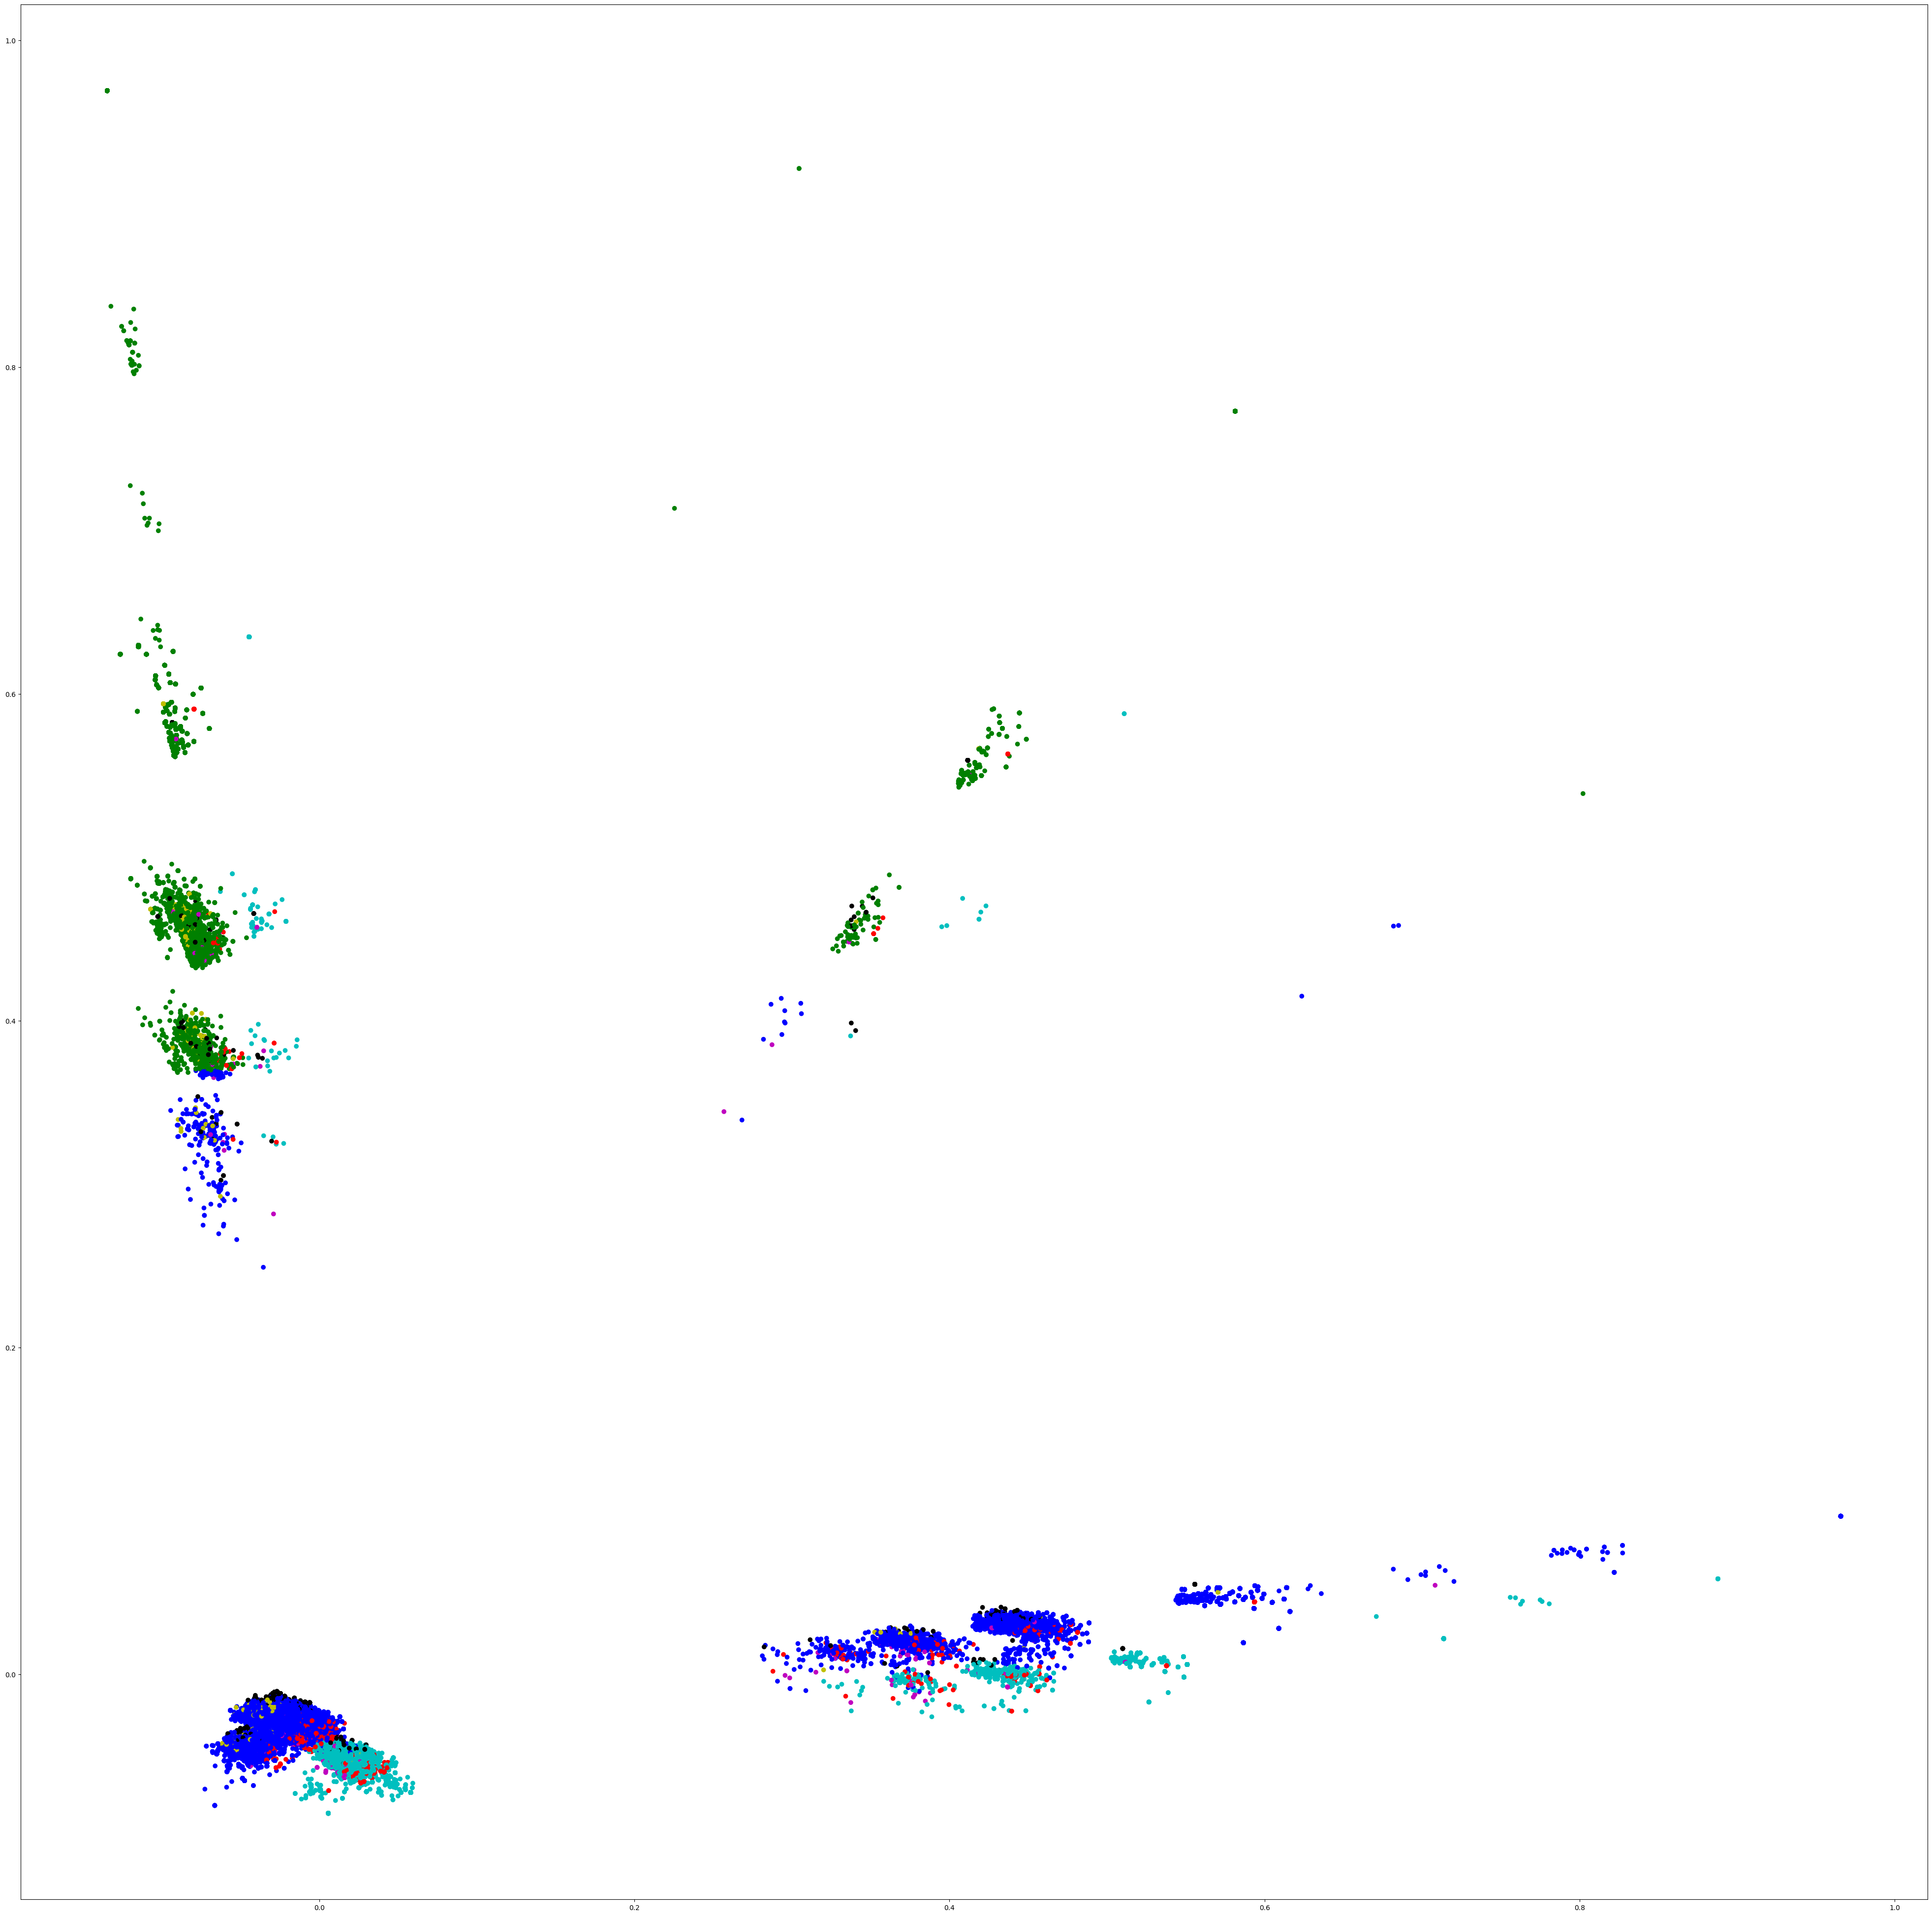

In [32]:
kmeans_indices=  model.fit_predict(vectors)
pca= PCA(n_components=2)

scatter_plot_points = pca.fit_transform(vectors.toarray())
colors= ['r', 'b', 'c', 'y', 'm', 'g', 'k']

x_axis= [o[0] for o in scatter_plot_points]
y_axis= [o[1] for o in scatter_plot_points]

fig, ax= plt.subplots(figsize=(50,50))
ax.scatter(x_axis, y_axis, c= [colors[d] for d in kmeans_indices])

plt.show() 

In [34]:
df.shape


(1244184, 2)